In [34]:
using AutomaticSingleCellToolbox,DataFrames

In [35]:
# Download https://cf.10xgenomics.com/samples/cell-exp/2.1.0/neuron_9k/neuron_9k_filtered_gene_bc_matrices.tar.gz
# tar xzvf neuron_9k_filtered_gene_bc_matrices.tar.gz
obj = Read10X("filtered_gene_bc_matrices/mm10/";min_cells=3)
FeaturePercentage!(obj)

[ Info: Currently, only support Cellranger's result!!!
[ Info: Reading matrix directory ...
[ Info: Generating matrix ...
[ Info: Reading barcodes ...
[ Info: Reading features/genes ...
[ Info: Gathering basic information
[ Info: There are some duplicated gene names! Add '.numbers' automatically!


"Finished!"

[ Info: Drawing counts/features hex plot...


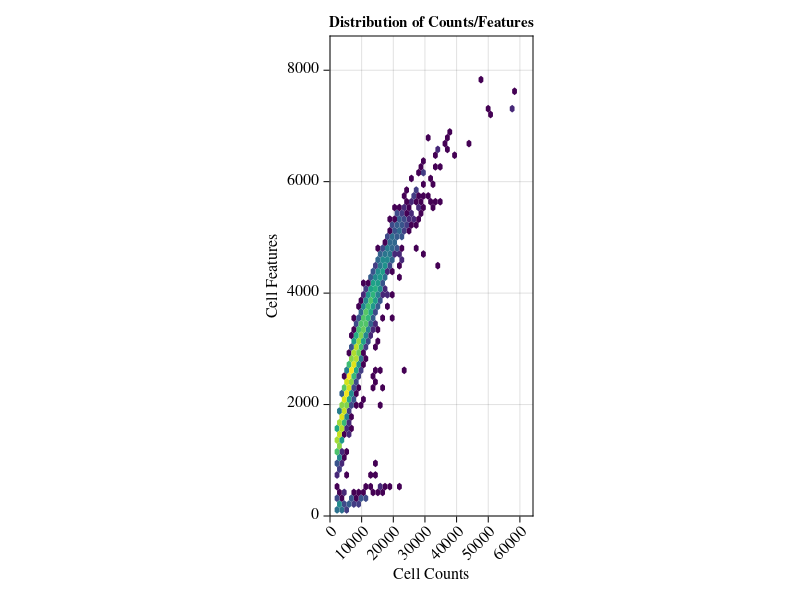

In [36]:
DrawQC(obj)

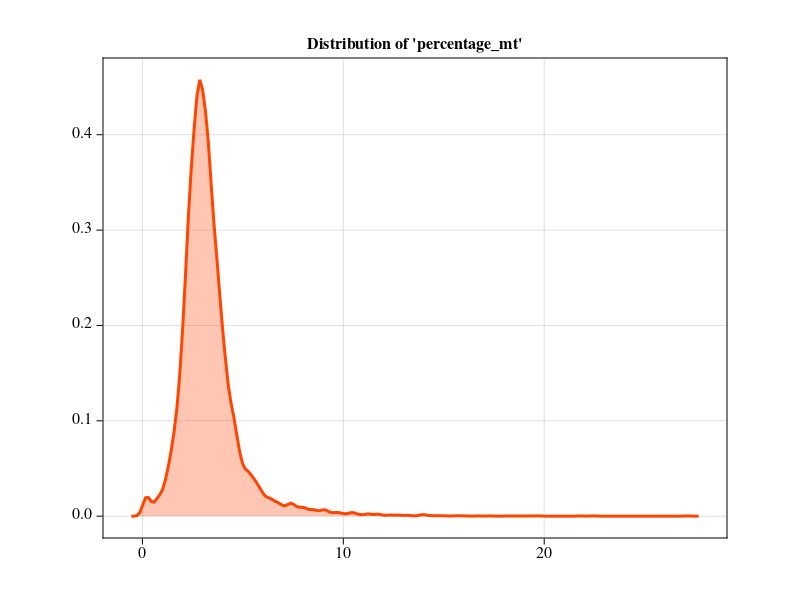

In [37]:
DrawQC(obj;obs_name="percentage_mt")

[ Info: Filtering cells by percentage_mt ...
[ Info: Linear regression for threshold ...
[ Info: The cutoff is about 6.6
[ Info: Filtering cells by the cluster of UMI/Feature
[ Info: Drawing counts/features hex plot...


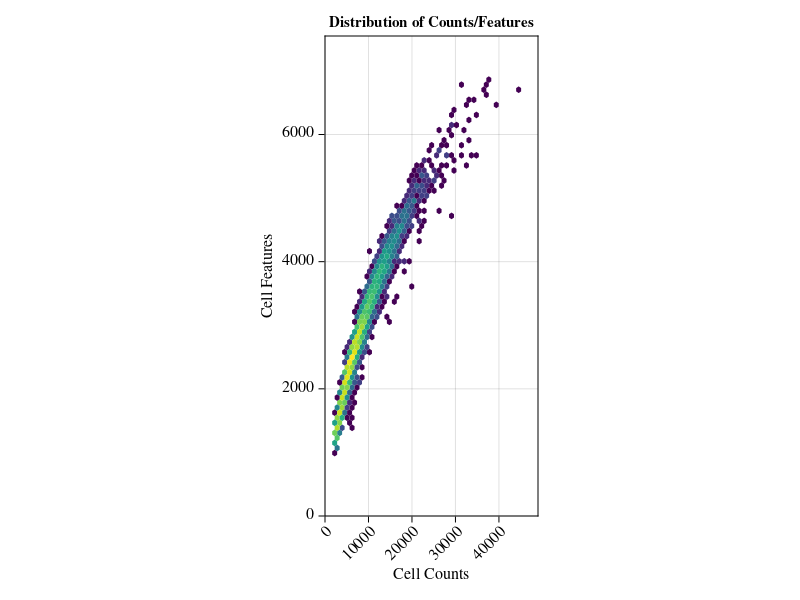

In [38]:
AutoFilter!(obj)
DrawQC(obj)

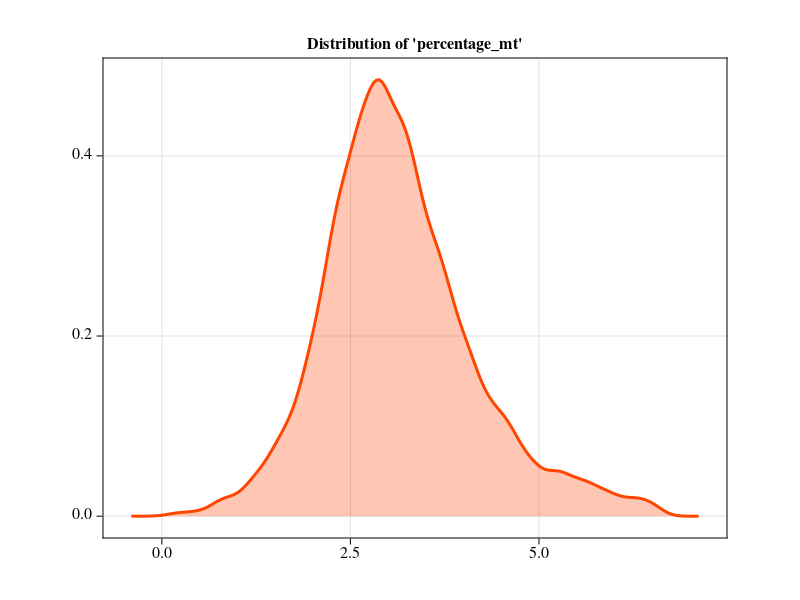

In [39]:
DrawQC(obj;obs_name="percentage_mt")

In [40]:
NormalizeData!(obj)
SelectHVG!(obj)

[ Info: 2000 HVGs were selected automatically!


"Finished!"

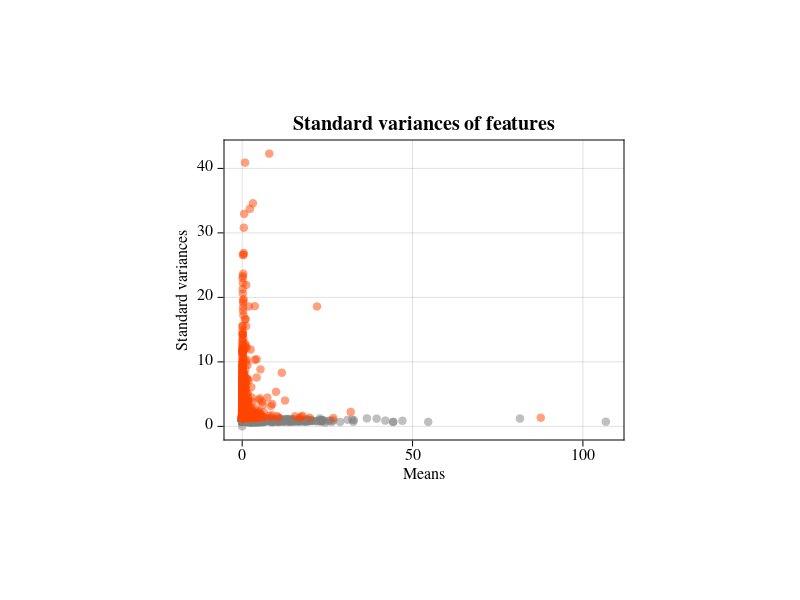

In [41]:
FeatureVariances(obj)

In [42]:
PCA!(obj)
UMAP!(obj)
TSNE!(obj)
Clustering!(obj)

[ Info: Scaling data...
[ Info: Running PCA ...
[ Info: Looking for Elbow threshold...
[ Info: We recommend top 17 PCs for downstream analysis automatically!
[ Info: Running UMAP...
[ Info: Running FIt-SNE ...


=============== t-SNE v1.2.1 ===============
fast_tsne data_path: ./tsne_in_2024.3.6.17.13.55-16011.dat
fast_tsne result_path: ./tsne_out_2024.3.6.17.13.55-16011.dat
fast_tsne nthreads: 64
Read the following parameters:
	 n 8678 by d 17 dataset, theta 0.500000,
	 perplexity 30.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 723.166667, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 8678 x 17 data matrix successfully. X[0,0] = -5.874650
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  K (

[ Info: Max modularity: 0.93727714
[ Info: Max modularity: 0.92309135
[ Info: Max modularity: 0.91278064
[ Info: Max modularity: 0.9014479
[ Info: Max modularity: 0.89285266
[ Info: Max modularity: 0.8855247
[ Info: Max modularity: 0.8784399
[ Info: Max modularity: 0.871339
[ Info: Max modularity: 0.8647958
[ Info: Recommended resolution is 0.9


"Finished!"

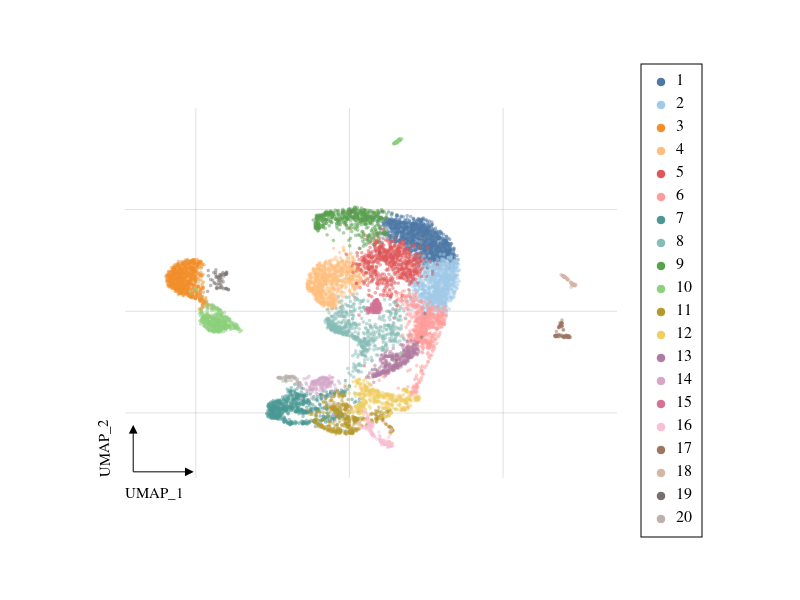

In [43]:
DimensionPoints(obj;dimension_name="umap",width=640,height=480)

┌ Warning: Only 1 group or groups number is more than colors number!
└ @ AutomaticSingleCellToolbox ~/.julia/packages/AutomaticSingleCellToolbox/r06Xs/src/Visualization.jl:194


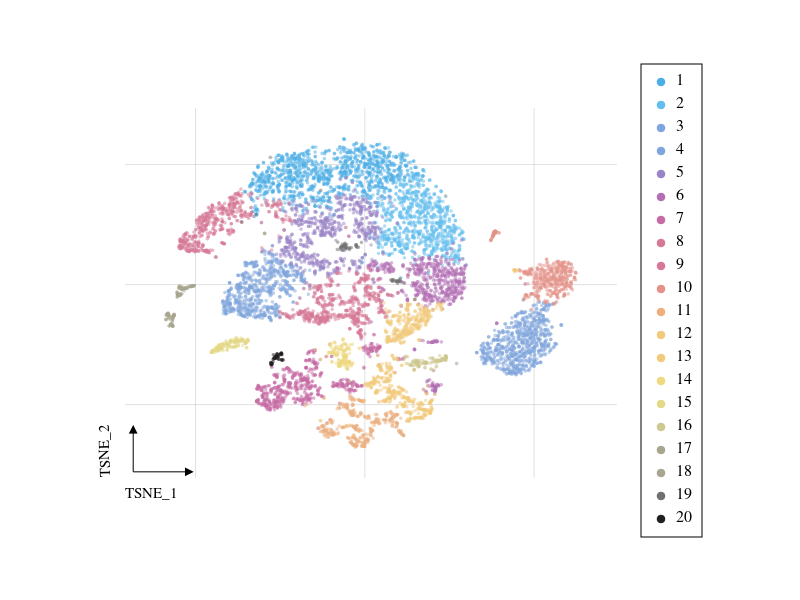

In [44]:
DimensionPoints(obj;dimension_name="tsne",colorscheme=:cmyk,width=640,height=480,point_size=5)

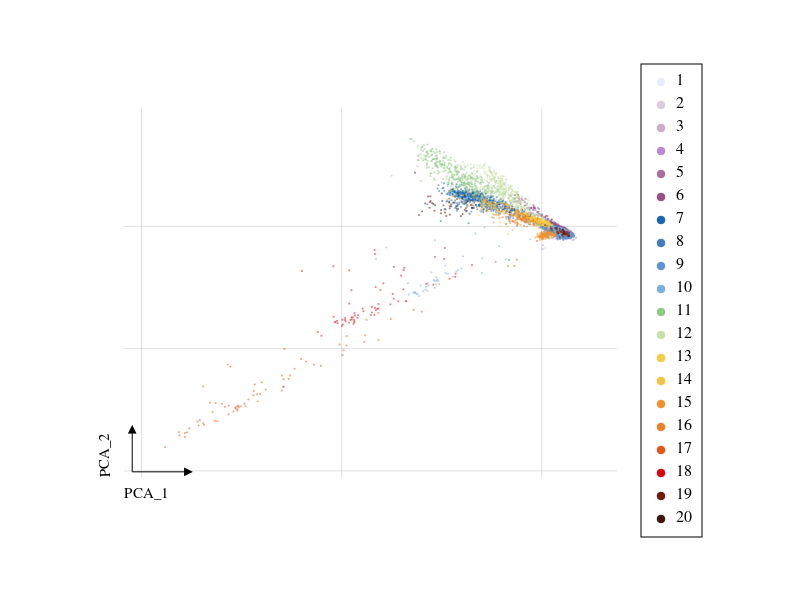

In [45]:
DimensionPoints(obj;dimension_name="pca",point_size=3,colorscheme=:tol_rainbow)

In [46]:
DE!(obj)

"Finished!"

In [47]:
groupby(obj.meta["clusters_latest_DE"],:group) |> 
    x -> combine(x) do y
        first(y,10)
end

Row,group,gene,score,pct1,log2fc
,String,String,Float64,Float64,Float64
1,1,Gpm6a,0.198056,0.986066,1.45489
2,1,Satb2,0.396031,0.768852,1.40385
3,1,Hs6st2,0.378379,0.740164,1.32904
4,1,Gria2,0.166548,0.985246,1.30558
5,1,Dab1,0.277056,0.798361,1.22246
6,1,Jakmip1,0.356569,0.681967,1.21648
7,1,Bcl11a,0.170079,0.968033,1.19278
8,1,Neurod2,0.160022,0.991803,1.18016
9,1,Robo2,0.24187,0.829508,1.17754


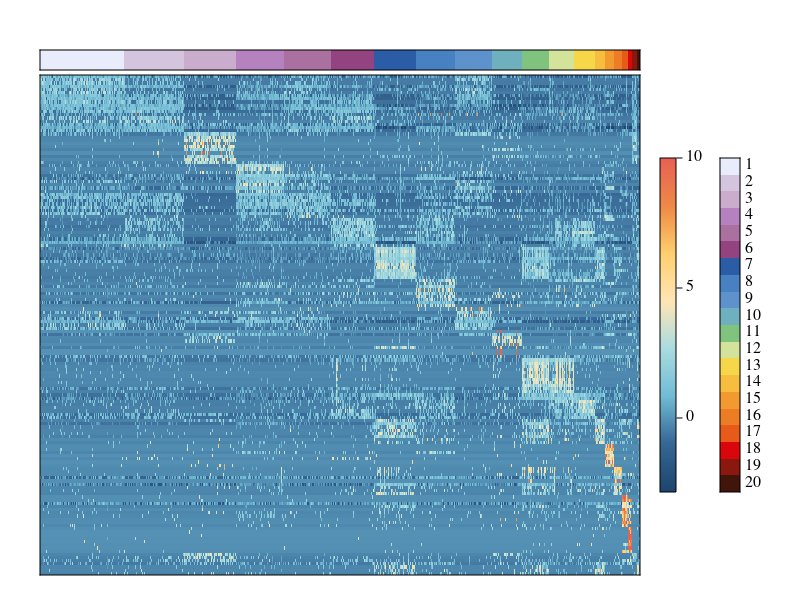

In [48]:
FeatureHeat(obj;width=600,height=500)